In [ ]:
from functions_thomas import *


In [2]:
np_seed = 1228
torch_seed = 872
np.random.seed(np_seed)
torch.manual_seed(torch_seed)
weights=np.concatenate(([0.0], np.logspace(-4, 1, 5)))
epochs_adam= 750
epochs_lbfgs=10
iter_lbfgs = 100
MAX_RETRIES = 3          # run at most 3 times per weight
THRESHOLD = 10        # any threshold you consider "too bad"
weights = np.concatenate(([0.0], np.logspace(-4, 1, 5)))
list_l2errors_train = []
list_linf_errors_train = []
list_l2errors_test = []
list_linf_errors_test = []
t_test = 0.2 * torch.rand(1000).view(-1,1)
x_test = torch.rand(1000).view(-1,1)

# === collocation points ===
x = np.linspace(0, 1, 100)
t = np.linspace(0, 0.2, 100)
xs, ts = np.meshgrid(x, t)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

for w in weights:
    print(f"Testing weight decay: {w}")

    success = False

    for attempt in range(1, MAX_RETRIES + 1):
        print(f"  Attempt {attempt} for weight {w}")

        # === initialize model fresh ===
        layers = [32, 64, 128, 128, 1]
        activations = [torch.tanh]*(len(layers)-1) + [None]
        dim=1
        kappa = 0.1
        u_0 = lambda x: torch.sin(torch.pi * x) + torch.sin(4 * torch.pi * x)
        rhs = lambda x, t: 0
        
        u_analytic = lambda x, t: (
        torch.sin(torch.pi * x) * torch.exp(-kappa * (torch.pi**2) * t) +
        torch.sin(4 * torch.pi * x) * torch.exp(-kappa * (4*torch.pi)**2 * t)
        )


        pde_nn = heat_nn(layers, activations, dim, u_0, kappa, rhs, w)
        pde_nn.set_analytic_solution(u_analytic)

        
        pde_nn.x = [x_colloc]
        pde_nn.t = t_colloc

        # === training ===
        pde_nn.train(lr=1e-2, weight_decay=0.0, epochs=epochs_adam, opt_time_scale=True, print_epochs=0)
        pde_nn.train_lbfgs(lr=1, opt_time_scale=True, epochs=epochs_lbfgs, max_iter=iter_lbfgs, print_epochs=0)

        # === evaluate ===
        err = pde_nn.L_2_error(x_test, t_test)

        if err < THRESHOLD:
            print(f"  Success! L2 error = {err:.3e}")
            success = True
            break
        else:
            print(f"  Too large error: {err:.3e}, retrying...")

    if not success:
        print(f"   All retries failed for weight {w}. Using last result.")

    # === record final errors (after success or after retries) ===
    list_l2errors_train.append(pde_nn.L_2_error())
    list_linf_errors_train.append(pde_nn.L_infty_error())
    list_l2errors_test.append(pde_nn.L_2_error(x_test, t_test))
    list_linf_errors_test.append(pde_nn.L_infty_error(x_test, t_test))
print(f"{list_l2errors_train=}")
print(f"{list_linf_errors_train=}")
print(f"{list_l2errors_test=}")
print(f"{list_linf_errors_test=}")


Testing weight decay: 0.0
  Attempt 1 for weight 0.0
  Success! L2 error = 5.457e-05
Testing weight decay: 0.0001
  Attempt 1 for weight 0.0001
break
  Too large error: nan, retrying...
  Attempt 2 for weight 0.0001
  Success! L2 error = 8.767e-04
Testing weight decay: 0.0017782794100389228
  Attempt 1 for weight 0.0017782794100389228
  Success! L2 error = 1.991e-02
Testing weight decay: 0.03162277660168379
  Attempt 1 for weight 0.03162277660168379
  Success! L2 error = 1.674e-02
Testing weight decay: 0.5623413251903491
  Attempt 1 for weight 0.5623413251903491
  Success! L2 error = 2.015e-01
Testing weight decay: 10.0
  Attempt 1 for weight 10.0
  Success! L2 error = 2.015e-01
list_l2errors_train=[np.float32(5.4228352e-05), np.float32(0.0009225018), np.float32(0.019981362), np.float32(0.016519507), np.float32(0.20056982), np.float32(0.20056987)]
list_linf_errors_train=[np.float32(0.00042930245), np.float32(0.012909442), np.float32(0.1509887), np.float32(0.11433345), np.float32(0.7789

In [3]:
# analyzing different activation functions
np_seed = 837
torch_seed = 139
np_seed = 123
torch_seed =34
np.random.seed(np_seed)
torch.manual_seed(torch_seed)
layers = [64, 64, 64, 64, 1]
#activations = [torch.tanh]*(len(layers)-1) + [None]
dim=1
kappa = 0.1
u_0 = lambda x: torch.sin(torch.pi * x) + torch.sin(4 * torch.pi * x)
rhs = lambda x, t: 0

u_analytic = lambda x, t: (
torch.sin(torch.pi * x) * torch.exp(-kappa * (torch.pi**2) * t) +
torch.sin(4 * torch.pi * x) * torch.exp(-kappa * (4*torch.pi)**2 * t)
)

activations_list = [[torch.tanh]*(len(layers)-1) + [None], [torch.relu]*(len(layers)-1) + [None], [torch.sigmoid]*(len(layers)-1) + [None]]
epochs_adam= 750
epochs_lbfgs=10
iter_lbfgs = 100
MAX_RETRIES = 3          # run at most 3 times per weight
THRESHOLD = 10        # any threshold you consider "too bad"
weights = np.concatenate(([0.0], np.logspace(-4, 1, 5)))
list_l2errors_train_adam = []
list_linf_errors_train_adam = []
list_l2errors_test_adam = []
list_linf_errors_test_adam = []
list_l2errors_train_lbfgs = []
list_linf_errors_train_lbfgs = []
list_l2errors_test_lbfgs = []
list_linf_errors_test_lbfgs = []
t_test = 0.2 * torch.rand(1000).view(-1,1)
x_test = torch.rand(1000).view(-1,1)

# === collocation points ===
x = np.linspace(0, 1, 100)
t = np.linspace(0, 0.2, 100)
xs, ts = np.meshgrid(x, t)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

for activations in activations_list:
    print("Testing ", activations[0])

    success = False

    for attempt in range(1, MAX_RETRIES + 1):
        print(f"  Attempt {attempt} for", activations[0])

        # === initialize model fresh ===


        pde_nn = heat_nn(layers, activations, dim, u_0, kappa, rhs, 0)
        pde_nn.set_analytic_solution(u_analytic)

        
        pde_nn.x = [x_colloc]
        pde_nn.t = t_colloc

        # === training ===
        pde_nn.train(lr=1e-2, weight_decay=0.0, epochs=epochs_adam, opt_time_scale=False, print_epochs=0)
        adam_train_l2 = pde_nn.L_2_error()
        adam_train_linf = pde_nn.L_infty_error()
        adam_test_l2 = pde_nn.L_2_error(x_test, t_test)
        adam_test_linf = pde_nn.L_infty_error(x_test, t_test)
        pde_nn.train_lbfgs(lr=1, opt_time_scale=False, epochs=epochs_lbfgs, max_iter=iter_lbfgs, print_epochs=0)

        # === evaluate ===
        err = pde_nn.L_2_error(x_test, t_test)

        if err < THRESHOLD:
            print(f"  Success! L2 error = {err:.3e}")
            success = True
            break
        else:
            print(f"  Too large error: {err:.3e}, retrying...")

    if not success:
        print(f"   All retries failed. Using last result.")

    # === record final errors (after success or after retries) ===
    list_l2errors_train_adam.append(adam_train_l2)
    list_linf_errors_train_adam.append(adam_train_linf)
    list_l2errors_test_adam.append(adam_test_l2)
    list_linf_errors_test_adam.append(adam_test_linf)

    list_l2errors_train_lbfgs.append(pde_nn.L_2_error())
    list_linf_errors_train_lbfgs.append(pde_nn.L_infty_error())
    list_l2errors_test_lbfgs.append(pde_nn.L_2_error(x_test, t_test))
    list_linf_errors_test_lbfgs.append(pde_nn.L_infty_error(x_test, t_test))
print(f"{list_l2errors_train_lbfgs=}")
print(f"{list_linf_errors_train_lbfgs=}")
print(f"{list_l2errors_test_lbfgs=}")
print(f"{list_linf_errors_test_lbfgs=}")

print(f"{list_l2errors_train_adam=}")
print(f"{list_linf_errors_train_adam=}")
print(f"{list_l2errors_test_adam=}")
print(f"{list_linf_errors_test_adam=}")


Testing  <built-in method tanh of type object at 0x721fdd8e5c20>
  Attempt 1 for <built-in method tanh of type object at 0x721fdd8e5c20>
  Success! L2 error = 2.764e-05
Testing  <built-in method relu of type object at 0x721fdd8e5c20>
  Attempt 1 for <built-in method relu of type object at 0x721fdd8e5c20>
break
  Too large error: nan, retrying...
  Attempt 2 for <built-in method relu of type object at 0x721fdd8e5c20>
break
  Too large error: nan, retrying...
  Attempt 3 for <built-in method relu of type object at 0x721fdd8e5c20>
break
  Too large error: nan, retrying...
   All retries failed. Using last result.
Testing  <built-in method sigmoid of type object at 0x721fdd8e5c20>
  Attempt 1 for <built-in method sigmoid of type object at 0x721fdd8e5c20>
break
  Too large error: nan, retrying...
  Attempt 2 for <built-in method sigmoid of type object at 0x721fdd8e5c20>
  Too large error: 1.151e+02, retrying...
  Attempt 3 for <built-in method sigmoid of type object at 0x721fdd8e5c20>
  Suc

In [ ]:
print(list_l2errors_test_lbfgs)

In [1]:
#new plot to regularization
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from heat_612 import heat_nn
list_l2errors_train=[np.float32(5.4228352e-05), np.float32(0.0009225018), np.float32(0.019981362), np.float32(0.016519507), np.float32(0.20056982), np.float32(0.20056987)]
list_linf_errors_train=[np.float32(0.00042930245), np.float32(0.012909442), np.float32(0.1509887), np.float32(0.11433345), np.float32(0.77890706), np.float32(0.7790205)]
list_l2errors_test=[np.float32(5.4568714e-05), np.float32(0.00087673607), np.float32(0.019906046), np.float32(0.016736703), np.float32(0.20152053), np.float32(0.20152123)]
list_linf_errors_test=[np.float32(0.00038591027), np.float32(0.01201719), np.float32(0.14820969), np.float32(0.11300993), np.float32(0.7777652), np.float32(0.7778198)]
weights=np.concatenate(([0.0], np.logspace(-4, 1, 5)))

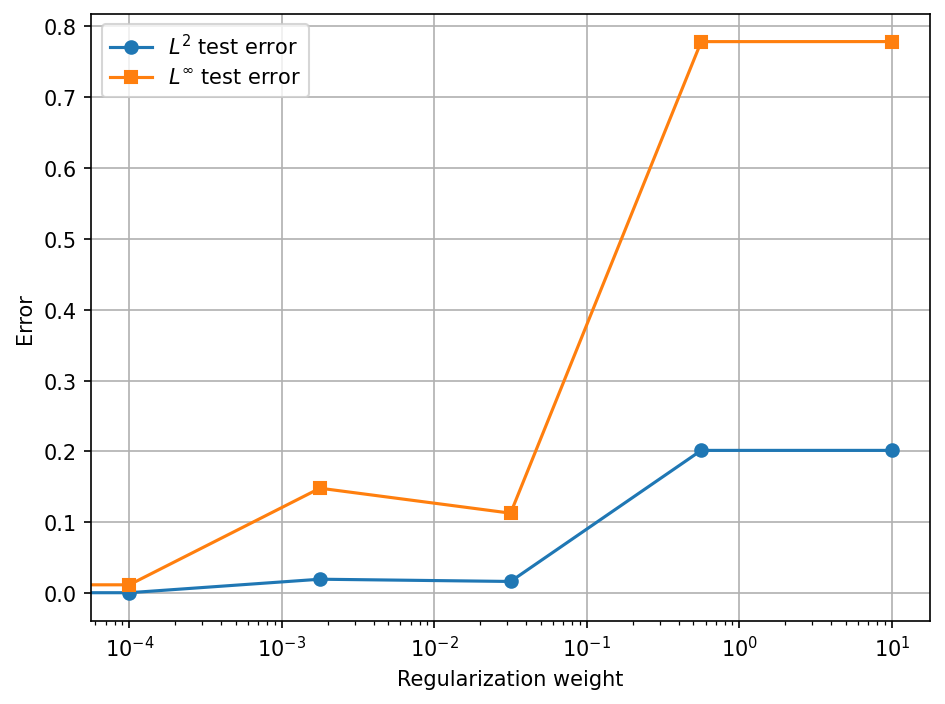

In [4]:
# Data

# Plot
plt.figure(dpi=150)
plt.plot(weights, list_l2errors_test, marker='o', label=r"$L^2$ test error")
plt.plot(weights, list_linf_errors_test, marker='s', label=r"$L^\infty$ test error")

plt.xlabel("Regularization weight")
plt.ylabel("Error")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
